In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

In [2]:
# Load Data
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

(<matplotlib.image.AxesImage at 0x7f4d01844f28>, 5)

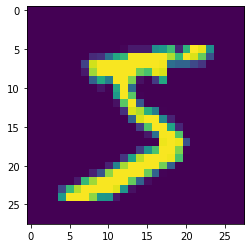

In [4]:
plt.imshow(X_train[0]), y_train[0]

In [5]:
X_train[0].shape

(28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [8]:
X_train = X_train.T
X_test = X_test.T

In [9]:
X_train[:, 0].shape

(784,)

In [10]:
y_train.shape

(60000,)

In [11]:
X_train = (X_train/255.0).astype('float32')
X_test = (X_test/255.0).astype('float32')

In [12]:
# Initialize Params
def initialize_params():
    
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5
    
    W2 = np.random.rand(64, 128) - 0.5
    b2 = np.random.rand(64, 1) - 0.5
    
    W3 = np.random.rand(32, 64) - 0.5
    b3 = np.random.rand(32, 1) - 0.5
    
    W4 = np.random.rand(10, 32) - 0.5
    b4 = np.random.rand(10, 1)  - 0.5 
    
    return W1, b1, W2, b2, W3, b3, W4, b4

# Activation function
def ReLU(Z):
    return np.maximum(0, Z)

# Softmax
def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

# One Hot Encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


# Forward Propagation
def forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, X):
    
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    
    Z3 = W3.dot(A2) + b3
    A3 = ReLU(Z3)
    
    Z4 = W4.dot(A3) + b4
    A4 = softmax(Z4)
 
    return Z1, A1, Z2, A2, Z3, A3, Z4, A4

# Derivative
def deriv_ReLU(Z):
    return Z > 0


# Back Propagation
def back_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, W1, W2, W3, W4, X, Y):
      
    m = Y.shape[0]
    
    one_hot_Y = one_hot(Y)
      
    dZ4 = A4 - one_hot_Y
    dW4 = 1/m * dZ4.dot(A3.T)
    db4 = 1/m * np.sum(dZ4)
    
    dZ3 = W4.T.dot(dZ4) * deriv_ReLU(Z3)
    dW3 = 1/m * dZ3.dot(A2.T)
    db3= 1/m * np.sum(dZ3)

    
    dZ2 = W3.T.dot(dZ3) * deriv_ReLU(Z2)
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    
    return dW4, db4, dW3, db3, dW2, db2, dW1, db1

# Update parameters
def update_params(dW4, db4, dW3, db3, dW2, db2, dW1, db1, W1, b1, W2, b2, W3, b3, W4, b4, alpha):
    
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    
    W4 = W4 - alpha * dW4
    b4 = b4 - alpha * db4
    
    return W1, b1, W2, b2, W3, b3, W4, b4

In [13]:
def get_predictions(A4):
    return np.argmax(A4, 0)

def get_accuracy(predictions, Y):
    
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, epochs, alpha):
    
    W1, b1, W2, b2, W3, b3, W4, b4 = initialize_params()
    
    for epoch in range(epochs):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, X)
        dW4, db4, dW3, db3, dW2, db2, dW1, db1 = back_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, W1, W2, W3, W4, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4 = update_params(dW4, db4, dW3, db3, dW2, db2, dW1, db1, W1, b1, W2, b2, W3, b3, W4, b4, alpha)
        
        if (epoch % 10 == 0):
            print("Epoch: ", epoch)
            print("Accuracy: ", get_accuracy(get_predictions(A4), Y))
            
    return W4, b4, W3, b3, W2, b2, W1, b1

In [14]:
W4, b4, W3, b3, W2, b2, W1, b1 = gradient_descent(X_train, y_train, 500, 0.1)

Epoch:  0
Accuracy:  0.11663333333333334
Epoch:  10
Accuracy:  0.3365
Epoch:  20
Accuracy:  0.4844833333333333
Epoch:  30
Accuracy:  0.5764833333333333
Epoch:  40
Accuracy:  0.6428
Epoch:  50
Accuracy:  0.6861
Epoch:  60
Accuracy:  0.7171833333333333
Epoch:  70
Accuracy:  0.74125
Epoch:  80
Accuracy:  0.7612333333333333
Epoch:  90
Accuracy:  0.777
Epoch:  100
Accuracy:  0.7904333333333333
Epoch:  110
Accuracy:  0.8007166666666666
Epoch:  120
Accuracy:  0.8106166666666667
Epoch:  130
Accuracy:  0.8187
Epoch:  140
Accuracy:  0.8260333333333333
Epoch:  150
Accuracy:  0.8321333333333333
Epoch:  160
Accuracy:  0.8366666666666667
Epoch:  170
Accuracy:  0.8172166666666667
Epoch:  180
Accuracy:  0.8421833333333333
Epoch:  190
Accuracy:  0.8506333333333334
Epoch:  200
Accuracy:  0.8540833333333333
Epoch:  210
Accuracy:  0.8577833333333333
Epoch:  220
Accuracy:  0.8605
Epoch:  230
Accuracy:  0.8637833333333333
Epoch:  240
Accuracy:  0.86615
Epoch:  250
Accuracy:  0.8685666666666667
Epoch:  260
A

In [15]:
def make_predictions(X, W1, b1, W2, b2, W3, b3, W4, b4):
    
    Z1, A1, Z2, A2, Z3, A3, Z4, A4 = forward_prop(W1, b1, W2, b2, W3, b3, W4, b4, X)
    predictions = get_predictions(A4)
    
    return predictions

def test_predictions(index, W1, b1, W2, b2, W3, b3, W4, b4):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3, W4, b4)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28))
    plt.gray()
    plt.imshow(current_image)
    plt.show

Prediction:  [1]
Label:  1


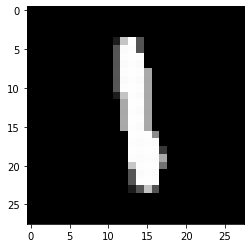

In [17]:
test_predictions(200, W1, b1, W2, b2, W3, b3, W4, b4)